###In this notebook I performed EDA on my personal spotify streaming data as of december 2022

In [1]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#reading personal spotify datasets and converting one column into timeseries data type
d1=pd.read_json("/content/drive/My Drive/Files/endsong_0.json",convert_dates=['ts'])
d2=pd.read_json("/content/drive/My Drive/Files/endsong_1.json",convert_dates=['ts'])
d3=pd.read_json("/content/drive/My Drive/Files/endsong_2.json",convert_dates=['ts'])

#concatenating the datasets
df=pd.concat([d1,d2,d3])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37468 entries, 0 to 6285
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 37468 non-null  datetime64[ns, UTC]
 1   username                           37468 non-null  object             
 2   platform                           37468 non-null  object             
 3   ms_played                          37468 non-null  int64              
 4   conn_country                       37468 non-null  object             
 5   ip_addr_decrypted                  37468 non-null  object             
 6   user_agent_decrypted               37468 non-null  object             
 7   master_metadata_track_name         37439 non-null  object             
 8   master_metadata_album_artist_name  37439 non-null  object             
 9   master_metadata_album_album_name   37439 non-null  

In [4]:
#removing all podcast entries (same as entries with no track uri)
df.dropna(subset=['spotify_track_uri'],inplace=True)
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-04-29 18:47:50+00:00,kvh9b0cd66rmu0zn1qialw86y,"Android OS 10 API 29 (motorola, motorola one v...",0,IN,59.96.163.47,unknown,Another Place,Bastille,Another Place,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1588186073138,False
1,2020-03-23 11:16:52+00:00,kvh9b0cd66rmu0zn1qialw86y,"Android OS 10 API 29 (motorola, motorola one v...",0,IN,117.215.196.130,unknown,Unpredictable,5 Seconds of Summer,Somewhere New,...,None,None,None,backbtn,backbtn,True,NaN,False,1584962206055,False
2,2020-03-03 08:08:50+00:00,kvh9b0cd66rmu0zn1qialw86y,"Android OS 10 API 29 (motorola, motorola one v...",214679,IN,27.62.19.21,unknown,Castaway,5 Seconds of Summer,Sounds Good Feels Good,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1583221895821,False
3,2021-01-14 19:36:51+00:00,kvh9b0cd66rmu0zn1qialw86y,"Android OS 10 API 29 (motorola, motorola one v...",211866,IN,103.155.223.57,unknown,Fire N Gold,Bea Miller,Young Blood,...,None,None,None,trackdone,trackdone,False,NaN,False,1610652817426,False
4,2020-11-30 16:41:13+00:00,kvh9b0cd66rmu0zn1qialw86y,"Android OS 10 API 29 (motorola, motorola one v...",271226,IN,103.70.199.165,unknown,Clarity,Zedd,Clarity,...,None,None,None,appload,trackdone,False,NaN,False,1606754213086,False


In [5]:
#all podcasts removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37439 entries, 0 to 6285
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 37439 non-null  datetime64[ns, UTC]
 1   username                           37439 non-null  object             
 2   platform                           37439 non-null  object             
 3   ms_played                          37439 non-null  int64              
 4   conn_country                       37439 non-null  object             
 5   ip_addr_decrypted                  37439 non-null  object             
 6   user_agent_decrypted               37439 non-null  object             
 7   master_metadata_track_name         37439 non-null  object             
 8   master_metadata_album_artist_name  37439 non-null  object             
 9   master_metadata_album_album_name   37439 non-null  

In [6]:
#removing columns that I will not be using:
df.drop(labels=['username','platform','conn_country','ip_addr_decrypted','user_agent_decrypted', 
                'episode_name','episode_show_name', 'spotify_episode_uri','skipped','offline_timestamp','incognito_mode'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37439 entries, 0 to 6285
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 37439 non-null  datetime64[ns, UTC]
 1   ms_played                          37439 non-null  int64              
 2   master_metadata_track_name         37439 non-null  object             
 3   master_metadata_album_artist_name  37439 non-null  object             
 4   master_metadata_album_album_name   37439 non-null  object             
 5   spotify_track_uri                  37439 non-null  object             
 6   reason_start                       37439 non-null  object             
 7   reason_end                         37439 non-null  object             
 8   shuffle                            37439 non-null  bool               
 9   offline                            37439 non-null  

In [8]:
#Listening time statistics:
print('total time spend on spotify =',df['ms_played'].sum(),'ms')
print('mean time spend on each song =',df['ms_played'].mean(),'ms')
print('std deviation of time spend =',df['ms_played'].std(),'ms')
print('longest song\'s length =',df['ms_played'].max(),'ms')

total time spend on spotify = 3227028891 ms
mean time spend on each song = 86194.3131760998 ms
std deviation of time spend = 97448.65623473622 ms
longest song's length = 775533 ms


In [9]:
print(df.value_counts('reason_start'))

reason_start
fwdbtn        17791
trackdone      9388
clickrow       5777
backbtn        2034
playbtn        1693
appload         679
trackerror       48
remote           29
dtype: int64


In [10]:
print(df.value_counts('reason_end'))

reason_end
fwdbtn                          17681
trackdone                       10444
endplay                          4951
backbtn                          2002
logout                           1569
unexpected-exit-while-paused      613
unexpected-exit                   117
remote                             38
unknown                            24
dtype: int64


In [11]:
print(df.value_counts('shuffle'))

shuffle
True     19143
False    18296
dtype: int64


In [12]:
print(df.value_counts('offline'))

offline
False    36027
True      1412
dtype: int64


In [13]:
print(df.value_counts('spotify_track_uri'))

spotify_track_uri
spotify:track:50DMJJpAeQv4fIpxZvQz2e    157
spotify:track:37ZJ0p5Jm13JPevGcx4SkF    131
spotify:track:4kAAko5kg70EjAWGF2ViWW    124
spotify:track:0OJN2A3Qyvd7pwSF0AIteC    109
spotify:track:0ZXdzaT1k688dkpNeEgQiV    101
                                       ... 
spotify:track:4DxybsoSiMUW0JI2oM0SSN      1
spotify:track:4EC9a3Ml1xTvcUjJXdzSE3      1
spotify:track:0xFomAiFsu5qCnLM0hu0UR      1
spotify:track:4ELXBKQHnfWiNt6OUcSo15      1
spotify:track:000tG7ZCNMDFLzIxobVSUZ      1
Length: 6499, dtype: int64


that's 6499 songs in total

In [14]:
#I want to split the 'ts' column with date-time to separate columns for year, month, date and time
#starting by converting all times to IST

from pytz import timezone
tz=timezone('Asia/Kolkata')
df['ts']=df['ts'].dt.tz_convert(tz)

df['year']=df['ts'].dt.year
df['month']=df['ts'].dt.month
df['date']=df['ts'].dt.day
df['day']=df['ts'].dt.weekday
df['time']=df['ts'].dt.time

df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,year,month,date,day,time
0,2020-04-30 00:17:50+05:30,0,Another Place,Bastille,Another Place,spotify:track:2Fn4gZI3MAeWTiv7cSVxZQ,fwdbtn,fwdbtn,True,False,2020,4,30,3,00:17:50
1,2020-03-23 16:46:52+05:30,0,Unpredictable,5 Seconds of Summer,Somewhere New,spotify:track:4OEbloNLqwYNGBPV3mQD9K,backbtn,backbtn,True,False,2020,3,23,0,16:46:52
2,2020-03-03 13:38:50+05:30,214679,Castaway,5 Seconds of Summer,Sounds Good Feels Good,spotify:track:0Lz17st4A5INY3ZESQhFNK,fwdbtn,trackdone,True,False,2020,3,3,1,13:38:50
3,2021-01-15 01:06:51+05:30,211866,Fire N Gold,Bea Miller,Young Blood,spotify:track:7IJyNRUZlKJJn9BfBBUgzh,trackdone,trackdone,False,False,2021,1,15,4,01:06:51
4,2020-11-30 22:11:13+05:30,271226,Clarity,Zedd,Clarity,spotify:track:60wwxj6Dd9NJlirf84wr2c,appload,trackdone,False,False,2020,11,30,0,22:11:13


In [15]:
#now i am removing ts column and a few others
df.drop(['ts','reason_start','reason_end','shuffle','offline'],axis=1,inplace=True)
df.head()

,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,year,month,date,day,time
0,0,Another Place,Bastille,Another Place,spotify:track:2Fn4gZI3MAeWTiv7cSVxZQ,2020,4,30,3,00:17:50
1,0,Unpredictable,5 Seconds of Summer,Somewhere New,spotify:track:4OEbloNLqwYNGBPV3mQD9K,2020,3,23,0,16:46:52
2,214679,Castaway,5 Seconds of Summer,Sounds Good Feels Good,spotify:track:0Lz17st4A5INY3ZESQhFNK,2020,3,3,1,13:38:50
3,211866,Fire N Gold,Bea Miller,Young Blood,spotify:track:7IJyNRUZlKJJn9BfBBUgzh,2021,1,15,4,01:06:51
4,271226,Clarity,Zedd,Clarity,spotify:track:60wwxj6Dd9NJlirf84wr2c,2020,11,30,0,22:11:13


In [16]:
#dropping songs with 0 ms_played
df=df[df['ms_played']!=0]
df.head()

,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,year,month,date,day,time
2,214679,Castaway,5 Seconds of Summer,Sounds Good Feels Good,spotify:track:0Lz17st4A5INY3ZESQhFNK,2020,3,3,1,13:38:50
3,211866,Fire N Gold,Bea Miller,Young Blood,spotify:track:7IJyNRUZlKJJn9BfBBUgzh,2021,1,15,4,01:06:51
4,271226,Clarity,Zedd,Clarity,spotify:track:60wwxj6Dd9NJlirf84wr2c,2020,11,30,0,22:11:13
5,1012,BOP,DaBaby,KIRK,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,2020,1,9,3,10:07:52
6,1805,Perfectly Imperfect,Declan J Donovan,Perfectly Imperfect,spotify:track:6TbkMxKZudkP6Sty7rkLU9,2021,9,12,6,12:54:32


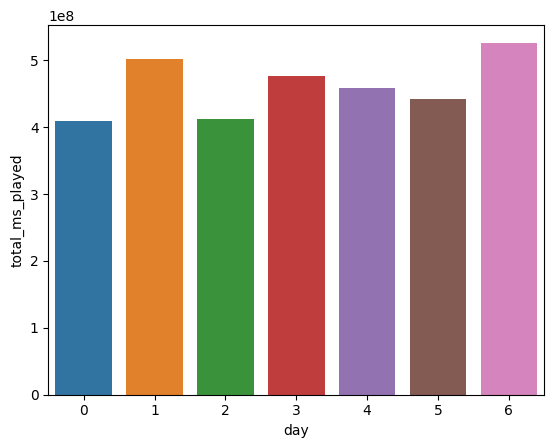

In [17]:
#bar chart depicting total listening time each day of the week
df_days=df.groupby('day')['ms_played'].sum().reset_index(name='total_ms_played')
sns.barplot(x=df_days.day,y=df_days.total_ms_played)
plt.show()

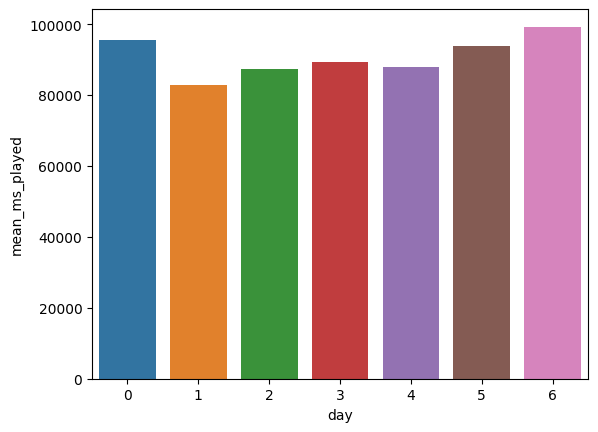

In [18]:
#bar chart depicting mean listening time each day:
df_days_mean=df.groupby('day')['ms_played'].mean().reset_index(name='mean_ms_played')
sns.barplot(x=df_days_mean.day,y=df_days_mean.mean_ms_played)
plt.show()

That is, I spent time listening to music all the same no matter what day it is!

In [19]:
print(df_days.total_ms_played.mean())
print(df_days.total_ms_played.median())
print(df_days.total_ms_played.std())

461004127.28571427
458436796.0
43808871.589331724


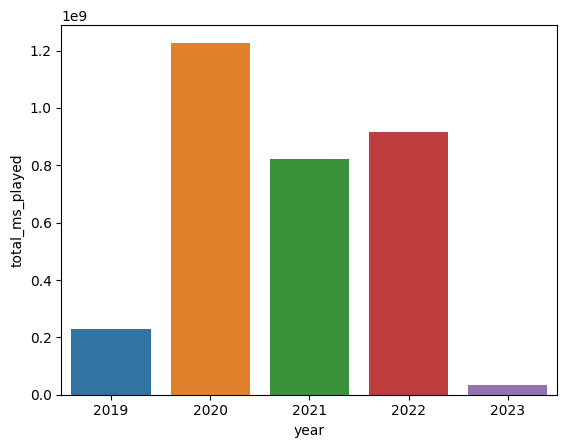

In [20]:
#let's see how much I listened each year
df_year=df.groupby('year')['ms_played'].sum().reset_index(name='total_ms_played')
sns.barplot(x=df_year.year,y=df_year.total_ms_played)
plt.show()

Yes. COVID.


Next up, grouping all the songs together and exploring

In [21]:
msp=df.groupby('spotify_track_uri')['ms_played'].sum() #track uri and how much ms it has played
title=df.groupby('spotify_track_uri')['master_metadata_track_name'].unique().apply(lambda x: " ".join(x)) #song titles of each of those track uri
album=df.groupby('spotify_track_uri')['master_metadata_album_album_name'].unique().apply(lambda x: " ".join(x)) #corresponding album names
artist=df.groupby('spotify_track_uri')['master_metadata_album_artist_name'].unique().apply(lambda x: " ".join(x)) #artists

In [22]:
#a new dataset with songs and total milliseconds listened
data=pd.concat([title,album,artist,msp],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6333 entries, spotify:track:000tG7ZCNMDFLzIxobVSUZ to spotify:track:7zvwxSE35TwHoXiolyjRDX
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   master_metadata_track_name         6333 non-null   object
 1   master_metadata_album_album_name   6333 non-null   object
 2   master_metadata_album_artist_name  6333 non-null   object
 3   ms_played                          6333 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 247.4+ KB


In [23]:
#returning top 20 songs according to time listened
data.sort_values(by='ms_played',ascending=False).head(20)

,master_metadata_track_name,master_metadata_album_album_name,master_metadata_album_artist_name,ms_played
spotify_track_uri,,,,
spotify:track:37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,Slippery When Wet,Bon Jovi,24658144
spotify:track:50DMJJpAeQv4fIpxZvQz2e,Monsters (feat. Demi Lovato and blackbear),Monsters (feat. Demi Lovato and blackbear),All Time Low,23566924
spotify:track:4kAAko5kg70EjAWGF2ViWW,光るなら,Milk,Goose house,19561227
spotify:track:5CQ30WqJwcep0pYcV4AMNc,Stairway to Heaven - Remaster,Led Zeppelin IV,Led Zeppelin,19069395
spotify:track:75JFxkI2RXiU7L9VXzMkle,The Scientist,A Rush of Blood to the Head,Coldplay,17562070
spotify:track:40riOy7x9W7GXjyGp4pjAv,Hotel California - 2013 Remaster,Hotel California,Eagles,17309451
spotify:track:0ZXdzaT1k688dkpNeEgQiV,I Don't Know Why,I Don't Know Why,NOTD,17209435
spotify:track:1mea3bSkSGXuIRvnydlB5b,Viva La Vida,Viva La Vida or Death and All His Friends,Coldplay,16815473
spotify:track:6H0zRPEV1ezBHOidNXSt1D,Fractures (feat. Nevve),Fractures (feat. Nevve),ILLENIUM,16269714


In [24]:
data.sort_values(by='ms_played',ascending=True)

,master_metadata_track_name,master_metadata_album_album_name,master_metadata_album_artist_name,ms_played
spotify_track_uri,,,,
spotify:track:59rVhom2nZck29rgp2PCVe,Otherside (Moti Remix),Glass Mansion Remixes,Elephante,4
spotify:track:5ROZkR98PX7FQBNOEi2FmC,STRAWBERRY,FANCY YOU,TWICE,7
spotify:track:3T9CfDxFYqZWSKxd0BhZrb,Wait,Red Pill Blues,Maroon 5,23
spotify:track:6nACZEZIt1CIBmF09r5Pb5,Remember This,Remember This,Jonas Brothers,23
spotify:track:5MhKHO4FYmpfDryQX9408O,Bend The Rules,Heartbreak Weather,Niall Horan,23
...,...,...,...,...
spotify:track:75JFxkI2RXiU7L9VXzMkle,The Scientist,A Rush of Blood to the Head,Coldplay,17562070
spotify:track:5CQ30WqJwcep0pYcV4AMNc,Stairway to Heaven - Remaster,Led Zeppelin IV,Led Zeppelin,19069395
spotify:track:4kAAko5kg70EjAWGF2ViWW,光るなら,Milk,Goose house,19561227


In [25]:
#dropping every song that has not played for more than 1 second
data=data.loc[data['ms_played']>1000]
data.head()

,master_metadata_track_name,master_metadata_album_album_name,master_metadata_album_artist_name,ms_played
spotify_track_uri,,,,
spotify:track:000tG7ZCNMDFLzIxobVSUZ,Your Love,Your Love,William Cas,160079
spotify:track:003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",The All-American Rejects,The All-American Rejects,123017
spotify:track:003vvx7Niy0yvhvHt4a68B,Mr. Brightside,Hot Fuss,The Killers,23629
spotify:track:009ImBOrIUlWgla8U05RAC,Unconditionally,PRISM,Katy Perry,303175
spotify:track:00ETaeHUQ6lops3oWU1Wrt,Hot Stuff,Hot Stuff,Kygo,172118


In [26]:
#who are my most listened artists?
grouped=data.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index(name='sum_milliseconds_played').sort_values(by='sum_milliseconds_played',ascending=False)[:20]
grouped

,master_metadata_album_artist_name,sum_milliseconds_played
1297,One Direction,158320062
13,5 Seconds of Summer,123372336
1812,Vicetone,77111395
364,Coldplay,64679181
272,Bon Jovi,50884240
182,Avril Lavigne,45869980
106,All Time Low,42751322
1156,Mike Perry,42318289
894,Kacey Musgraves,41288919
1882,YOASOBI,39456721


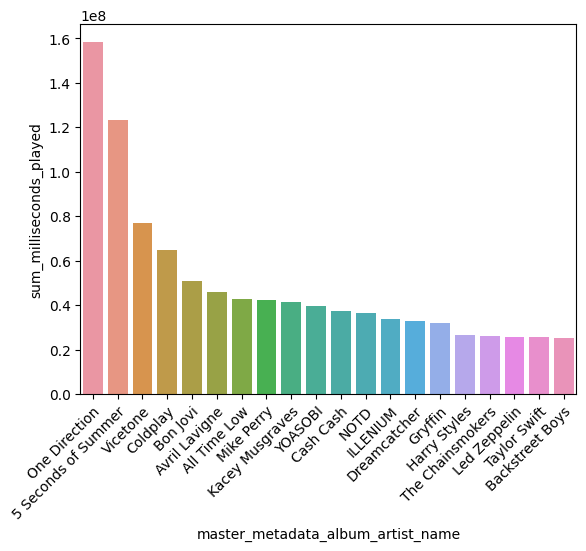

In [27]:
#plotting a graph for the same
sns.barplot(x=grouped['master_metadata_album_artist_name'],y=grouped['sum_milliseconds_played'])
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.show()

In [28]:
#moving on to albums
grouped2=data.groupby('master_metadata_album_album_name')['ms_played'].sum().reset_index(name='sum_milliseconds_played').sort_values(by='sum_milliseconds_played',ascending=False)[:20]
grouped2

,master_metadata_album_album_name,sum_milliseconds_played
2096,Made In The A.M.,46319793
2176,Midnight Memories (Deluxe),42177798
68,5 Seconds Of Summer,39025087
1308,Golden Hour,33242283
3127,Sounds Good Feels Good,31528752
1085,FOUR,29478671
3059,Slippery When Wet,29257396
497,"Blood, Sweat & 3 Years",28936740
2222,Monsters (feat. Demi Lovato and blackbear),25064147
3972,Youngblood,24727466


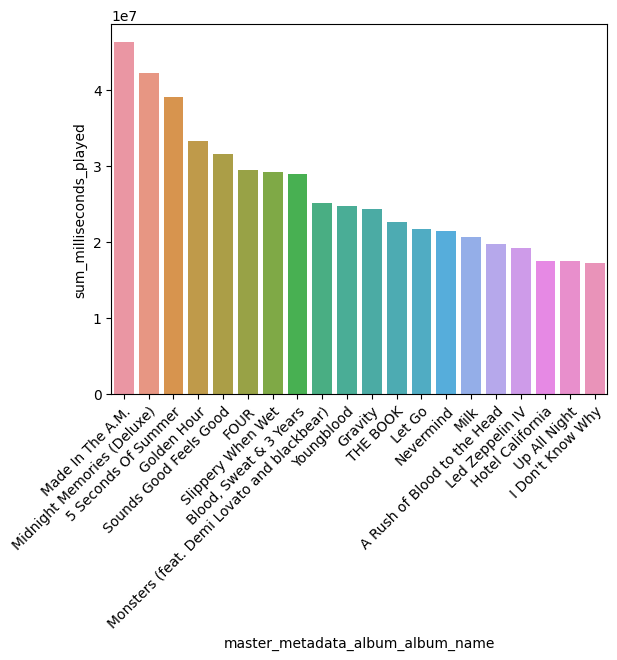

In [29]:
#and its barplot
sns.barplot(x=grouped2['master_metadata_album_album_name'],y=grouped2['sum_milliseconds_played'])
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.show()

In [30]:
#top 20 songs now
grouped3=data.groupby('master_metadata_track_name')['ms_played'].sum().reset_index(name='sum_milliseconds_played').sort_values(by='sum_milliseconds_played',ascending=False)[:20]
grouped3

,master_metadata_track_name,sum_milliseconds_played
2520,Livin' On A Prayer,25664736
2826,Monsters (feat. Demi Lovato and blackbear),23566924
3785,Smells Like Teen Spirit,21091538
5221,光るなら,20564461
3896,Stairway to Heaven - Remaster,19149064
4245,The Scientist,17759879
1860,Hotel California - 2013 Remaster,17309451
1918,I Don't Know Why,17209435
4532,Viva La Vida,16815473
1453,Fractures (feat. Nevve),16269714


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


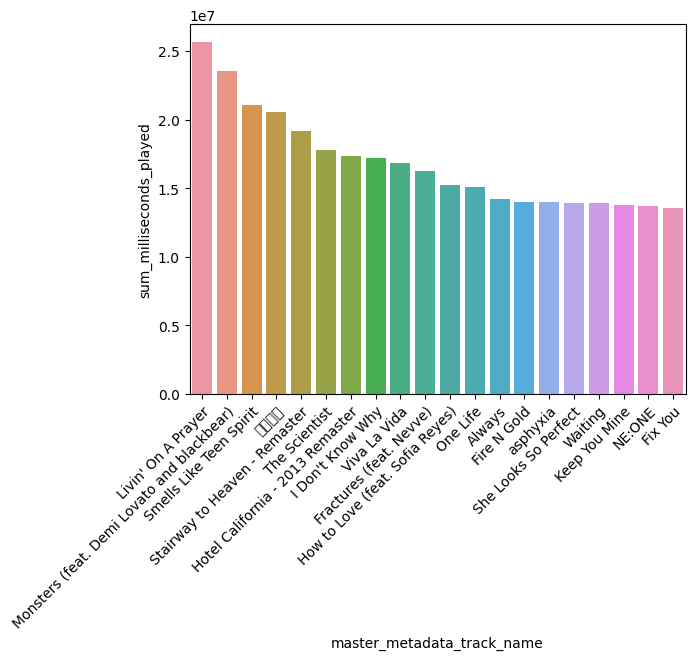

In [31]:
#and the barplot
sns.barplot(x=grouped3['master_metadata_track_name'],y=grouped3['sum_milliseconds_played'])
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.show()